In [142]:
# Dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
#connect to database
engine= create_engine("sqlite:///hawaii.sqlite")

In [40]:
#reflect tables into classes
Base= automap_base()

In [41]:
Base.prepare(engine, reflect = True)

In [42]:
#prints the classes mapped to the base
Base.classes.keys()

['measurements', 'stations']

In [44]:
#Precipitation Analysis

In [45]:
Measurement=Base.classes.measurements

In [46]:
session = Session(engine)

In [47]:
last_year_precipitation=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > '2016-12-31').\
order_by(Measurement.date).all()

In [141]:
last_year

[('2017-01-11', 63, 3),
 ('2017-02-09', 59, 3),
 ('2017-02-25', 61, 1),
 ('2017-03-07', 62, 5),
 ('2017-03-08', 64, 3),
 ('2017-03-16', 66, 4),
 ('2017-04-30', 60, 2),
 ('2017-05-01', 65, 6),
 ('2017-05-09', 67, 12),
 ('2017-05-11', 70, 17),
 ('2017-05-19', 68, 9),
 ('2017-06-25', 71, 14),
 ('2017-06-26', 73, 8),
 ('2017-07-09', 78, 5),
 ('2017-07-10', 69, 14),
 ('2017-07-11', 72, 18),
 ('2017-07-13', 74, 26),
 ('2017-07-16', 80, 4),
 ('2017-07-26', 75, 17),
 ('2017-07-30', 81, 4),
 ('2017-08-05', 82, 3),
 ('2017-08-06', 83, 1),
 ('2017-08-15', 77, 17),
 ('2017-08-17', 76, 21),
 ('2017-08-18', 79, 5)]

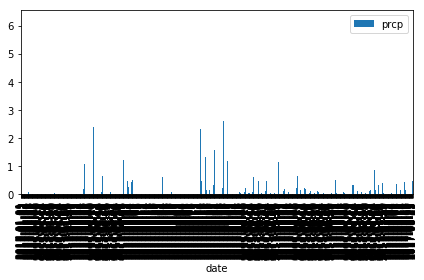

In [48]:
precip_df=pd.DataFrame(last_year_precipitation, columns=["date", "prcp"])
precip_df.set_index("date", inplace=True)
precip_df.plot.bar()
plt.tight_layout()
plt.show()

In [49]:
#Station Analysis

In [50]:
Station=Base.classes.stations

In [51]:
session=Session(engine)

In [52]:
session.query(func.count(Station.station)).all()

[(9)]

In [53]:
stations_obs=session.query(Measurement.station,func.count(Measurement.tobs),Station.name).group_by(Measurement.station)\
.order_by(func.count(Measurement.tobs).desc()).all()

In [54]:
most_active_station=stations_obs[0]
most_active_station

('USC00519281', 24948, 'MANOA LYON ARBO 785.2, HI US')

In [55]:
stations_obs

[('USC00519281', 24948, 'MANOA LYON ARBO 785.2, HI US'),
 ('USC00513117', 24264, 'MANOA LYON ARBO 785.2, HI US'),
 ('USC00519397', 24165, 'MANOA LYON ARBO 785.2, HI US'),
 ('USC00519523', 23148, 'MANOA LYON ARBO 785.2, HI US'),
 ('USC00516128', 22356, 'MANOA LYON ARBO 785.2, HI US'),
 ('USC00514830', 17433, 'MANOA LYON ARBO 785.2, HI US'),
 ('USC00511918', 17388, 'MANOA LYON ARBO 785.2, HI US'),
 ('USC00517948', 6147, 'MANOA LYON ARBO 785.2, HI US'),
 ('USC00518838', 3078, 'MANOA LYON ARBO 785.2, HI US')]

In [56]:
last_year=session.query(Measurement.tobs,func.count(Measurement.tobs)).filter(Measurement.date > '2016-12-31').\
filter(Measurement.station == "USC00519281").group_by(Measurement.tobs).order_by(Measurement.date).all()

In [143]:
tobs_list=np.ravel(last_year)

In [144]:
tobs_list

array(['2017-01-11', '63', '3', '2017-02-09', '59', '3', '2017-02-25',
       '61', '1', '2017-03-07', '62', '5', '2017-03-08', '64', '3',
       '2017-03-16', '66', '4', '2017-04-30', '60', '2', '2017-05-01',
       '65', '6', '2017-05-09', '67', '12', '2017-05-11', '70', '17',
       '2017-05-19', '68', '9', '2017-06-25', '71', '14', '2017-06-26',
       '73', '8', '2017-07-09', '78', '5', '2017-07-10', '69', '14',
       '2017-07-11', '72', '18', '2017-07-13', '74', '26', '2017-07-16',
       '80', '4', '2017-07-26', '75', '17', '2017-07-30', '81', '4',
       '2017-08-05', '82', '3', '2017-08-06', '83', '1', '2017-08-15',
       '77', '17', '2017-08-17', '76', '21', '2017-08-18', '79', '5'],
      dtype='<U10')

In [58]:
station_analysis_df=pd.DataFrame(last_year, columns=['tobs','frequency'])
station_analysis_df

,tobs,frequency
0,63,3
1,59,3
2,61,1
3,62,5
4,64,3
5,66,4
6,60,2
7,65,6
8,67,11
9,70,17


In [59]:
tobs=station_analysis_df["tobs"]
bins=12

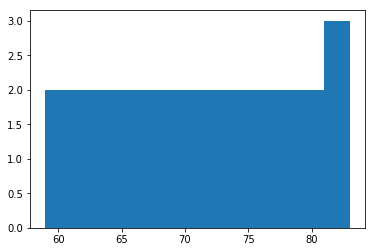

In [60]:
plt.hist(tobs, bins)
plt.show()

In [61]:
#Temperature analysis
#Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
#Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

#Plot the min, avg, and max temperature from your previous query as a bar chart.


#Use the average temperature as the bar height.
#Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [139]:
def calc_temps(start_date, end_date):
    start_date.replace("-"," ")
    end_date.replace("-", " ")
    begin=session.query(Measurement.tobs).filter(func.strftime('%Y %m %d', Measurement.date)==start_date).order_by(Measurement.tobs).all()
    end=session.query(Measurement.tobs).filter(func.strftime('%Y %m %d',Measurement.date)==end_date).order_by(Measurement.tobs).all()
    total=begin + end
    max_temp=max(total)
    min_temp=min(total)
    return max_temp,min_temp